In [3]:
from ordec import entropy_complexity

In [4]:
import numpy as np
from tqdm.auto import tqdm, trange

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# 1-Dimensional

Entropy-complexity calculations on different 1-dimensional time series

In [5]:
def skew_tent_map(n=100000, mu=1.9, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    
    for i in range(1, len(x)):
        if x[i-1] < .5:
            x[i] = x[i-1]*mu
        else:
            x[i] = (1-x[i-1])*mu
    
    return x

In [6]:
def logistic(r=4, n=100000, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
    return(x)

In [7]:
def henon_map(n=1000000, a=1.4, b=0.3, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, len(x)):
        x[i] = 1 - a * x[i-1] ** 2 + b * x[i-1]
    return x

In [32]:
time_series = [
    logistic(), skew_tent_map(), henon_map(),
    np.sin(np.arange(0,1000,.01)),
    np.random.normal(size=100000)
]
ts_names = ['Logistic map', 'Skew tent map', 'Henon map', 'Sine', 'Gaussian noise']

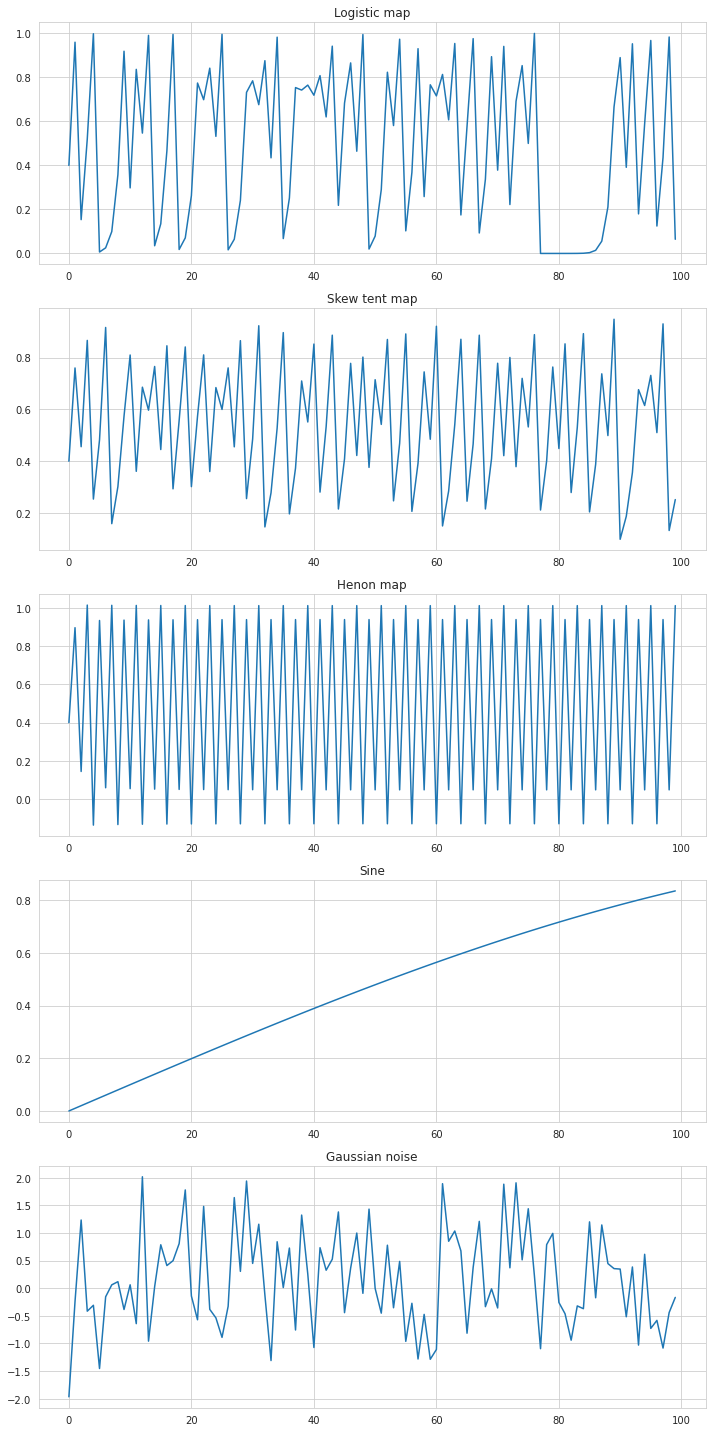

In [33]:
fig, axs = plt.subplots(5,1, figsize=(10,20))
for ts, ax, label_ in zip(time_series, axs.reshape(-1), ts_names):
    ax.plot(ts[:100])
    ax.set_title(label_)
plt.tight_layout()
plt.show()

In [26]:
n = 4    # window length
m = 1    # embedding dimension

In [34]:
EC = [entropy_complexity(series.reshape(-1,1), n=n, m=m) for series in time_series]    # reshape 1d data to 2d array (len x 1)

In [14]:
from ordec_borders import get_borders

In [28]:
min_ec, max_ec = get_borders(n=n, m=m)

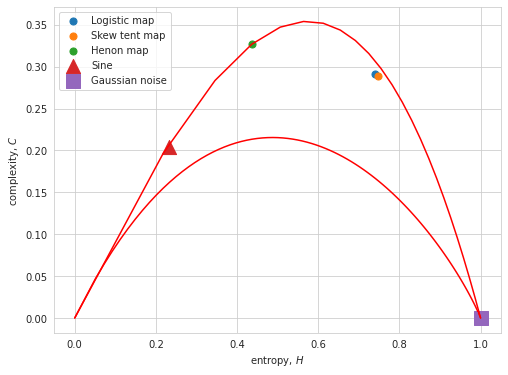

In [35]:
f, ax = plt.subplots(1,1,figsize=(8, 6))

ax.plot(max_ec[:,0], max_ec[:,1],color='r')
ax.plot(min_ec[:,0], min_ec[:,1],color='r')

for EC_, label_ in zip(EC[:3], ts_names):
    ax.scatter(*EC_, label=label_, s=200, marker='.')

ax.scatter(*EC[-2], label=ts_names[-2], s=200, marker='^')
ax.scatter(*EC[-1], label=ts_names[-1], s=200, marker='s')


ax.set_xlabel('entropy, $H$')
ax.set_ylabel('complexity, $C$')

ax.legend()
plt.show()

# 2-Dimensional

In [11]:
X_random = np.random.normal(size=(100,4))

In [12]:
n = 6
m = 4
e, c = entropy_complexity(X_random, n=n, m=m)
print(e, c)

0.17303933019336848 0.1730393292016372


In [15]:
n = 2
m = 4
e, c = entropy_complexity(X_random, n=n, m=m)
print(e, c)

0.9860050480684107 0.017322820918722795


# Borders

In [3]:
from ordec_borders import get_borders

In [4]:
n = 6
m = 4
min_ec, max_ec = get_borders(n=n,m=m)

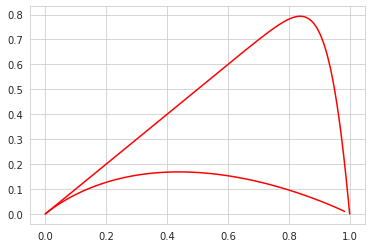

In [6]:
sns.lineplot(x=min_ec[:,0], y=min_ec[:,1], color='r')
sns.lineplot(x=max_ec[:,0], y=max_ec[:,1], color='r')
plt.show()